In [19]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('breast-cancer-data.csv')
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [21]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# cols = X.columns.tolist()
# newCols = [cols[5], *cols[0:5], *cols[6:]]
# X = X[newCols]
print(y.value_counts())
print(X.head())

no-recurrence-events    196
recurrence-events        81
Name: Class, dtype: int64
     age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0  30-39   premeno      30-34       0-2        no          3   left   
1  40-49   premeno      20-24       0-2        no          2  right   
2  40-49   premeno      20-24       0-2        no          2   left   
3  60-69      ge40      15-19       0-2        no          2  right   
4  40-49   premeno        0-4       0-2        no          2  right   

  breast-quad irradiat  
0    left_low       no  
1    right_up       no  
2    left_low       no  
3     left_up       no  
4   right_low       no  


In [22]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X.iloc[:, 0] = labelencoder_X.fit_transform(X.iloc[:, 0])
X.iloc[:, 1] = labelencoder_X.fit_transform(X.iloc[:, 1])
X.iloc[:, 2] = labelencoder_X.fit_transform(X.iloc[:, 2])
X.iloc[:, 3] = labelencoder_X.fit_transform(X.iloc[:, 3])
X.iloc[:, 4] = labelencoder_X.fit_transform(X.iloc[:, 4])
X.iloc[:, 5] = labelencoder_X.fit_transform(X.iloc[:, 5])
X.iloc[:, 6] = labelencoder_X.fit_transform(X.iloc[:, 6])
X.iloc[:, 7] = labelencoder_X.fit_transform(X.iloc[:, 7])
X.iloc[:, 8] = labelencoder_X.fit_transform(X.iloc[:, 8])

onehotencoder = OneHotEncoder(categorical_features = [0,1,2,3,4,5,6,7,8])
X = pd.DataFrame(onehotencoder.fit_transform(X).toarray())
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y = pd.DataFrame(labelencoder_y.fit_transform(y))
X.head()

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

AUC: 0.602


C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


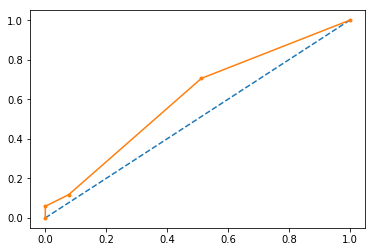

In [127]:
# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

f1=0.516 auc=0.770 ap=0.707


C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


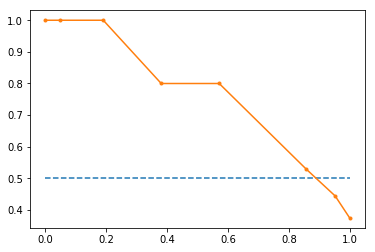

In [125]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot
# generate 2 class dataset
# X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=123)
# fit a model
model = KNeighborsClassifier(n_neighbors=7, weights='uniform', leaf_size=28, p=2)
model.fit(trainX, trainy)
# predict probabilities
probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model.predict(testX)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(testy, probs)
# calculate F1 score
f1 = f1_score(testy, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(testy, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

# Logistic Regressor

f1=0.296 auc=0.485 ap=0.500


C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


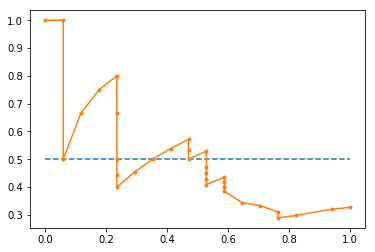

In [30]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(penalty='l1', tol=0.0001, C=0.5, fit_intercept=True, intercept_scaling=1.5, class_weight=None, random_state=123, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None)
lg_model.fit(X_train, y_train)
# predict probabilities
lg_probs = lg_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lg_probs = lg_probs[:, 1]
# predict class values
yhat = lg_model.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, lg_probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, lg_probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

In [31]:
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
logreg=LogisticRegression()

# Create k-Fold cross-validation
kf = KFold(n_splits=20, shuffle=True, random_state=123)
# Do k-fold cross-validation
cv_results = cross_val_score(logreg, # Pipeline
                             X_train, # Feature matrix
                             y_train, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores
print(cv_results.mean())

predicted = cross_val_predict(logreg, X_train, y_train, cv=10)
print(metrics.accuracy_score(y_train, predicted))
print(metrics.classification_report(y_train, predicted))

0.7556818181818181
0.7104072398190046
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       157
           1       0.50      0.36      0.42        64

    accuracy                           0.71       221
   macro avg       0.63      0.61      0.61       221
weighted avg       0.69      0.71      0.69       221



C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

In [32]:
# !pip install imblearn
from imblearn.over_sampling import SMOTE

C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


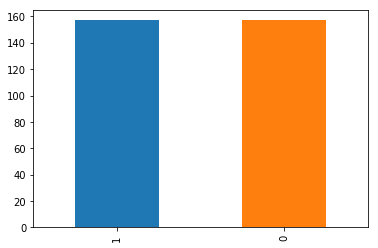

In [33]:
# SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5, m_neighbors='deprecated',
# out_step='deprecated', kind='deprecated', svm_estimator='deprecated',
# n_jobs=1, ratio=None)
sm = SMOTE(random_state = 123, k_neighbors=5)
X_train_new, y_train_new = sm.fit_sample(X_train, y_train)
pd.Series(y_train_new).value_counts().plot.bar()


In [34]:
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

# Create k-Fold cross-validation
kf = KFold(n_splits=20, shuffle=True, random_state=123)
# Do k-fold cross-validation
cv_results = cross_val_score(logreg, # Pipeline
                             X_train_new, # Feature matrix
                             y_train_new, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores
print(cv_results.mean())

predicted = cross_val_predict(logreg, X_train_new, y_train_new, cv=10)
print(metrics.accuracy_score(y_train_new, predicted))
print(metrics.classification_report(y_train_new, predicted))

0.7514583333333332
0.7579617834394905
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       157
           1       0.75      0.78      0.76       157

    accuracy                           0.76       314
   macro avg       0.76      0.76      0.76       314
weighted avg       0.76      0.76      0.76       314



C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Z003Z4FY.AD001\AppData\Local\Contin

f1=0.529 auc=0.487 ap=0.507


C:\Users\Z003Z4FY.AD001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


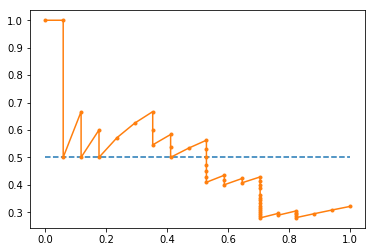

In [36]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
# lg_model = LogisticRegression(penalty='l2', tol=0.0001, C=0.5, fit_intercept=True, intercept_scaling=1.5, class_weight=None, random_state=1234, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None)
lg_model = LogisticRegression()
lg_model.fit(X_train_new, y_train_new)
# predict probabilities
lg_probs = lg_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lg_probs = lg_probs[:, 1]
# predict class values
yhat = lg_model.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, lg_probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, lg_probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()